# Data Cleaning

Source: https://www.kaggle.com/datasets/abcsds/pokemon

**In diesem Jupyter Notebook werden wir einen Datensatz von Pokémon bearbeiteen und analysieren.**

## Imports

In dieser Section werden die Import festgelegt und die Daten eingelesen.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# load data
df = pd.read_csv("data/Pokemon.csv", delimiter=",")

In [3]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Data Preperation

### Schritte der Datenvorbereitung:
**Löschen unnötiger Spalten:** Wir entfernen Spalten, die für unsere Analysezwecke nicht relevant sind, um die Übersichtlichkeit und Effizienz der Datenverarbeitung zu verbessern.

**Umbenennen von Pokémon-Namen:** Einige Pokémon-Namen wie "BlastoiseMega Blastoise" sind nicht standardisiert. Wir werden diese Namen in ein einheitlicheres Format wie "Mega Blastoise" ändern. Diese Umbenennung erfolgt teilweise automatisch durch Skripte und teilweise manuell, um sicherzustellen, dass alle Namensvarianten korrekt angepasst werden.


In [4]:
del df["#"]
del df["Total"]
df["Type 2"] = df["Type 2"].fillna("None")

In [5]:
def adjust_name(name):
    if 'Mega' in name:
        # Teilt den Namen am "Mega" und nimmt den letzten Teil
        return 'Mega ' + name.split('Mega')[1].strip()
    return name

def insert_dash(name):
    # Teile den Namen auf und füge " - " ein
    for size in ['Average', 'Small', 'Large', 'Super']:
        if size in name:
            name = name.replace(size, ' - ' + size)
            break
    return name

def clean_name(name):
    # Prüfen auf Wiederholungen durch Teilen des Namens
    parts = name.split()
    if len(parts) > 1 and parts[0] in name.replace(parts[0], '', 1):
        return parts[0] + ' ' + name.replace(parts[0], '', 1).strip()
    return name


# Namen anpassen
df['Name'] = df['Name'].apply(insert_dash)
df['Name'] = df['Name'].apply(adjust_name)
df['Name'] = df['Name'].apply(clean_name)
df['Name'] = df['Name'].replace('HoopaHoopa', 'Hoopa', regex=True)
df['Name'] = df['Name'].replace('GroudonPrimal', 'Primal', regex=True)


In [6]:
df.to_csv("data/preprocessed_pokemon.csv")

### Merge Evoulationstufen

In [7]:
df = pd.read_csv("data/pokemon_with_evolution_edited.csv", delimiter=";")

In [8]:
del df["Evolution"]

In [9]:
replacement_dict = {
    'Basic': 1,
    'Stage1': 2,
    'Stage2': 3,
    'Mega': 4
}

# Ersetze die Werte in der Spalte 'evolution_2' mithilfe des Dictionaries
df['Evolution'] = df['evolution_2'].replace(replacement_dict)

/var/folders/08/8s3n2f895zgg2psmtlmnblh80000gn/T/ipykernel_48996/1716144714.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Evolution'] = df['evolution_2'].replace(replacement_dict)


In [10]:
df["Total"] = df["HP"] + df["Attack"] + df["Defense"] + df["Sp. Atk"] + df["Sp. Def"] + df["Speed"] 

## Data Understanding

In dieser Section werden die Daten evaluiert.

### Functions

In [11]:
def df_nan_values(df):
    for i in df.columns:
        print(f"column {i} have: {df[i].isna().sum()} NaN Values")

### Overview

In [12]:
df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Evolution,Total
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,1.745000,435.10250
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.883714,119.96304
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,1.000000,180.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,1.000000,330.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,2.000000,450.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,2.000000,515.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,4.000000,780.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         800 non-null    object
 1   Type 1       800 non-null    object
 2   Type 2       414 non-null    object
 3   HP           800 non-null    int64 
 4   Attack       800 non-null    int64 
 5   Defense      800 non-null    int64 
 6   Sp. Atk      800 non-null    int64 
 7   Sp. Def      800 non-null    int64 
 8   Speed        800 non-null    int64 
 9   Generation   800 non-null    int64 
 10  Legendary    800 non-null    bool  
 11  evolution_2  800 non-null    object
 12  Evolution    800 non-null    int64 
 13  Total        800 non-null    int64 
dtypes: bool(1), int64(9), object(4)
memory usage: 82.2+ KB


In [14]:
df_nan_values(df)

column Name have: 0 NaN Values
column Type 1 have: 0 NaN Values
column Type 2 have: 386 NaN Values
column HP have: 0 NaN Values
column Attack have: 0 NaN Values
column Defense have: 0 NaN Values
column Sp. Atk have: 0 NaN Values
column Sp. Def have: 0 NaN Values
column Speed have: 0 NaN Values
column Generation have: 0 NaN Values
column Legendary have: 0 NaN Values
column evolution_2 have: 0 NaN Values
column Evolution have: 0 NaN Values
column Total have: 0 NaN Values


### Plots

#### Counting

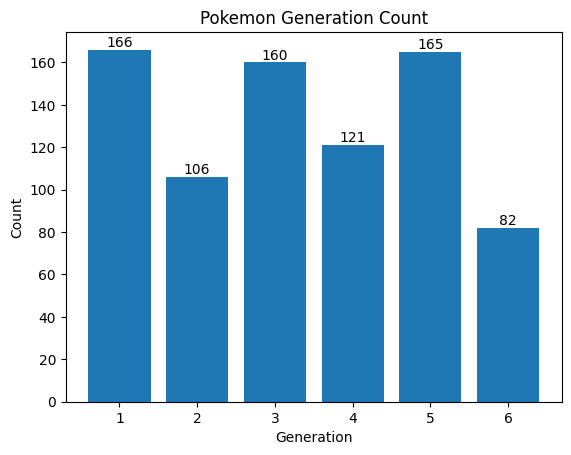

In [15]:
generation_count = df['Generation'].value_counts()

# Sorting the values by Generation
generation_count = generation_count.sort_index()

# Generating the bar plot
plt.bar(generation_count.index, generation_count.values)

# Adding the exact values above each bar
for x, y in zip(generation_count.index, generation_count.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Giving the titles
plt.title('Pokemon Generation Count')
plt.xlabel('Generation')
plt.ylabel('Count')

# Showing our plot
plt.show()

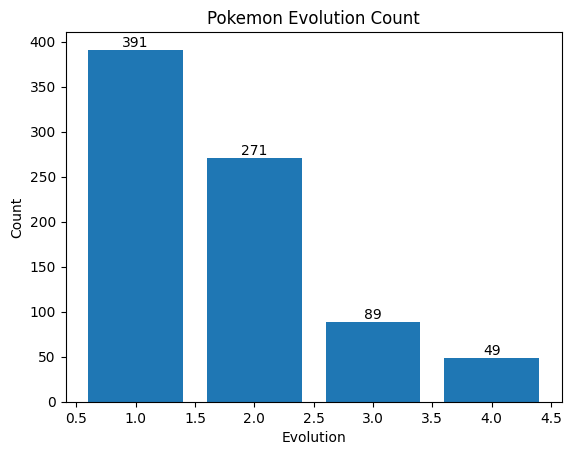

In [16]:
generation_count = df['Evolution'].value_counts()

# Sorting the values by Generation
generation_count = generation_count.sort_index()

# Generating the bar plot
plt.bar(generation_count.index, generation_count.values)

# Adding the exact values above each bar
for x, y in zip(generation_count.index, generation_count.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Giving the titles
plt.title('Pokemon Evolution Count')
plt.xlabel('Evolution')
plt.ylabel('Count')

# Showing our plot
plt.show()

#### Stats

<Axes: xlabel='Defense', ylabel='Attack'>

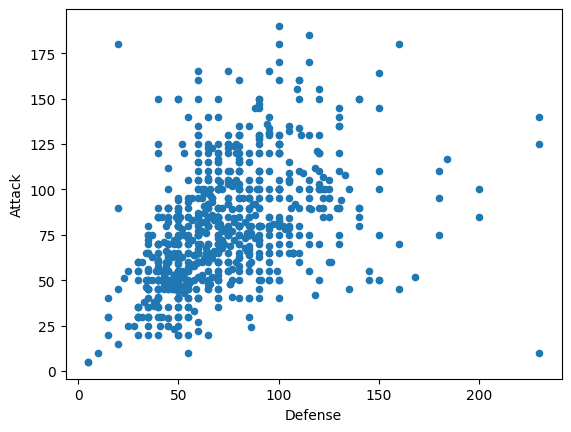

In [17]:
df.plot.scatter(x='Defense', y='Attack')

<Axes: xlabel='Sp. Atk', ylabel='Sp. Def'>

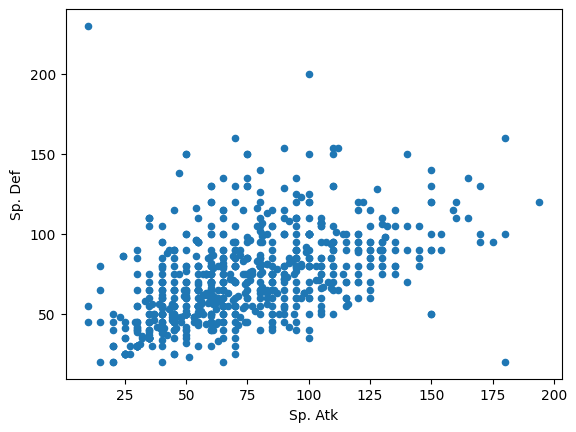

In [18]:
df.plot.scatter(x='Sp. Atk', y='Sp. Def')

<Axes: xlabel='Sp. Atk', ylabel='Sp. Def'>

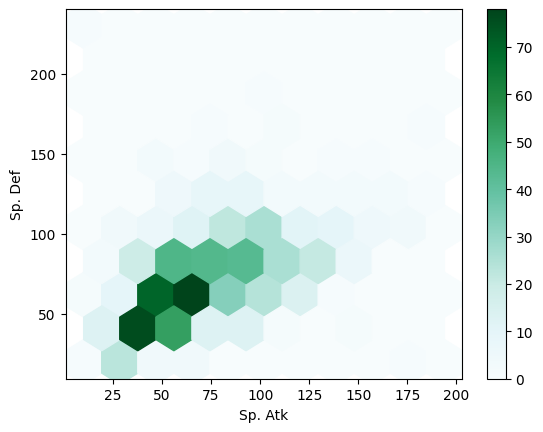

In [19]:
df.plot.hexbin(x='Sp. Atk', y='Sp. Def', gridsize=10)

<Axes: xlabel='Defense', ylabel='Attack'>

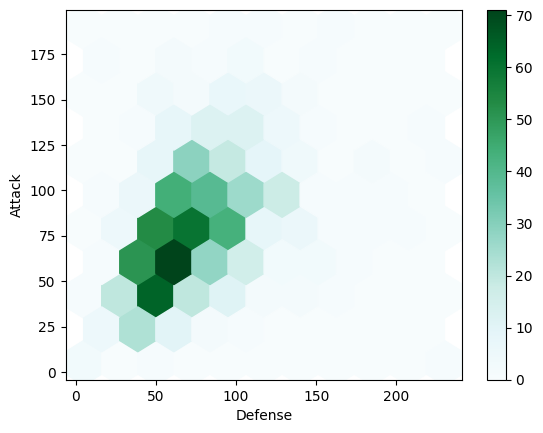

In [20]:
df.plot.hexbin(x='Defense', y='Attack', gridsize=10)

### Strongest Generation (Violine Plots)

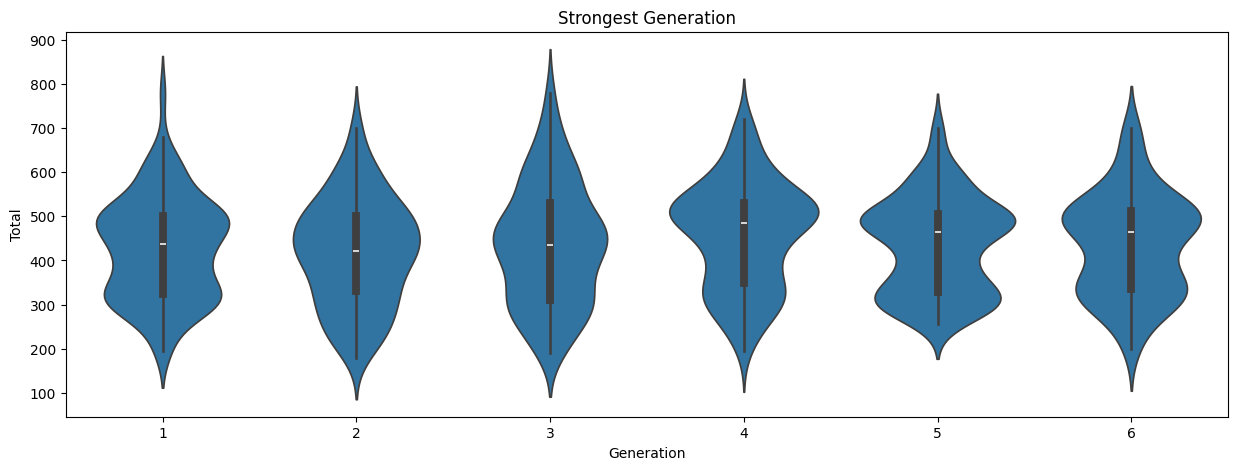

In [21]:
# Diagramm erstellen
plt.subplots(figsize=(15,5))
plt.title('Strongest Generation')
sns.violinplot(x="Generation", y="Total", data=df)
plt.show()

### Strongest Evolution?

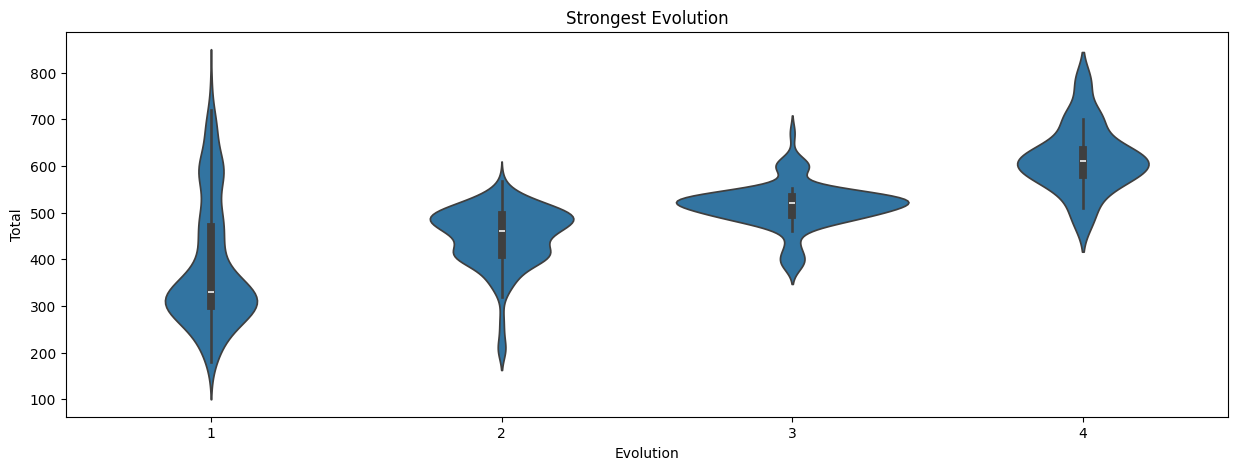

In [22]:
plt.subplots(figsize=(15,5))
plt.title('Strongest Evolution')
sns.violinplot(x="Evolution", y="Total", data=df)
plt.show()

### Strongest Type?

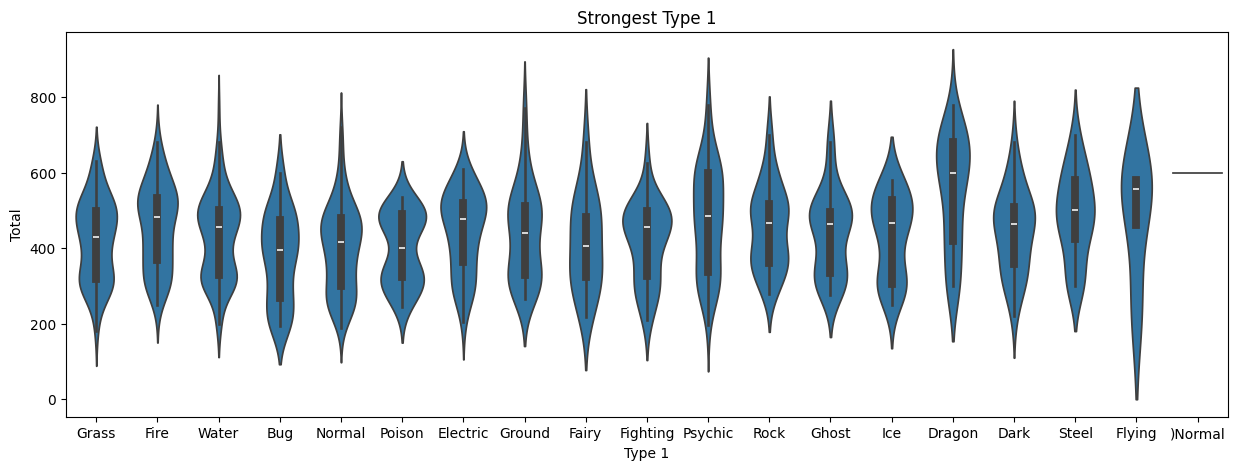

In [23]:
plt.subplots(figsize=(15,5))
plt.title('Strongest Type 1')
sns.violinplot(x="Type 1", y="Total", data=df)
plt.show()

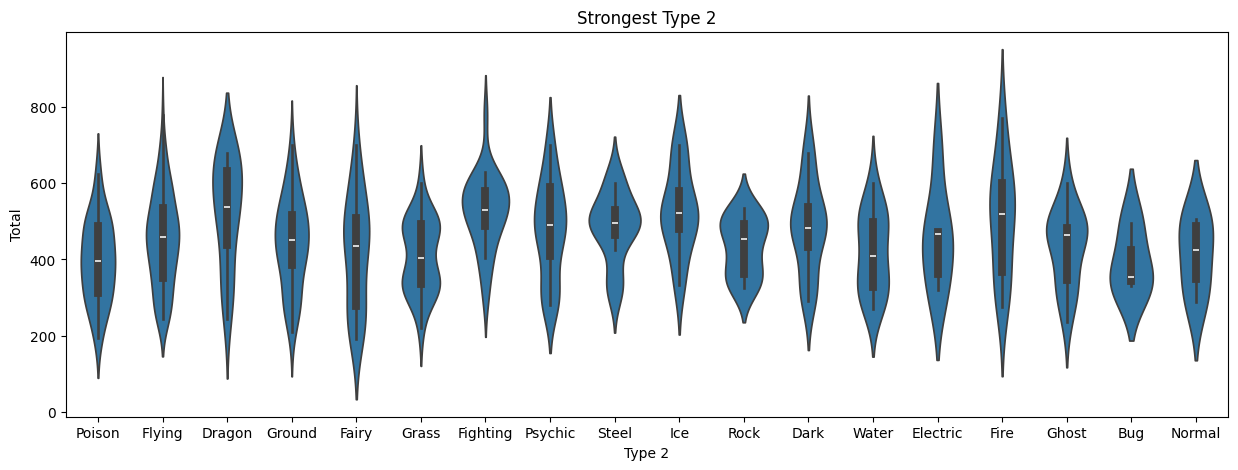

In [24]:
plt.subplots(figsize=(15,5))
plt.title('Strongest Type 2')
sns.violinplot(x="Type 2", y="Total", data=df)
plt.show()

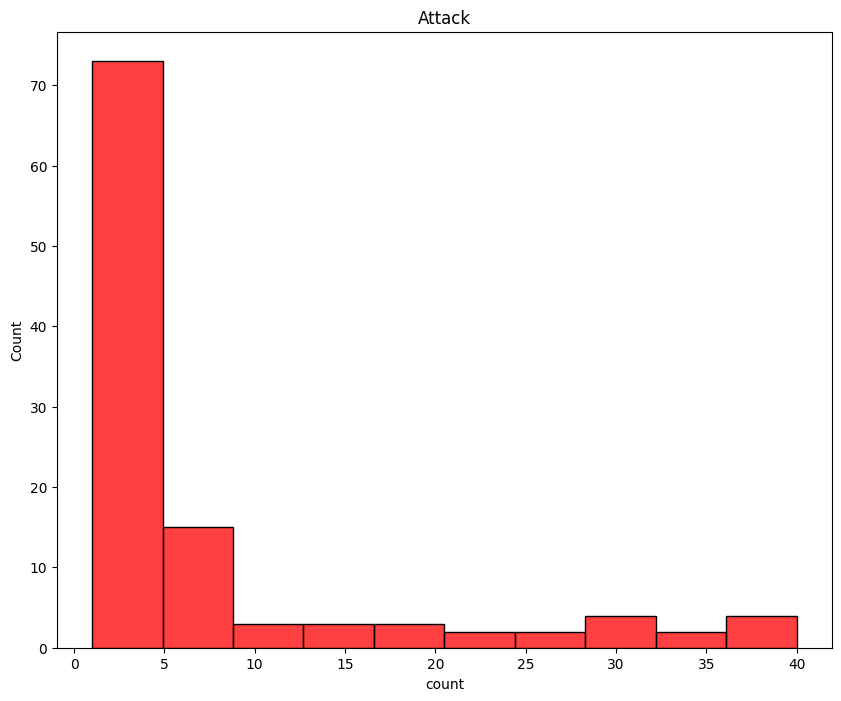

In [25]:
f,ax=plt.subplots(figsize=(10,8))
x=df['Attack'].value_counts()
ax=sns.histplot(x,bins=10,color="red")
plt.title('Attack')
plt.show()

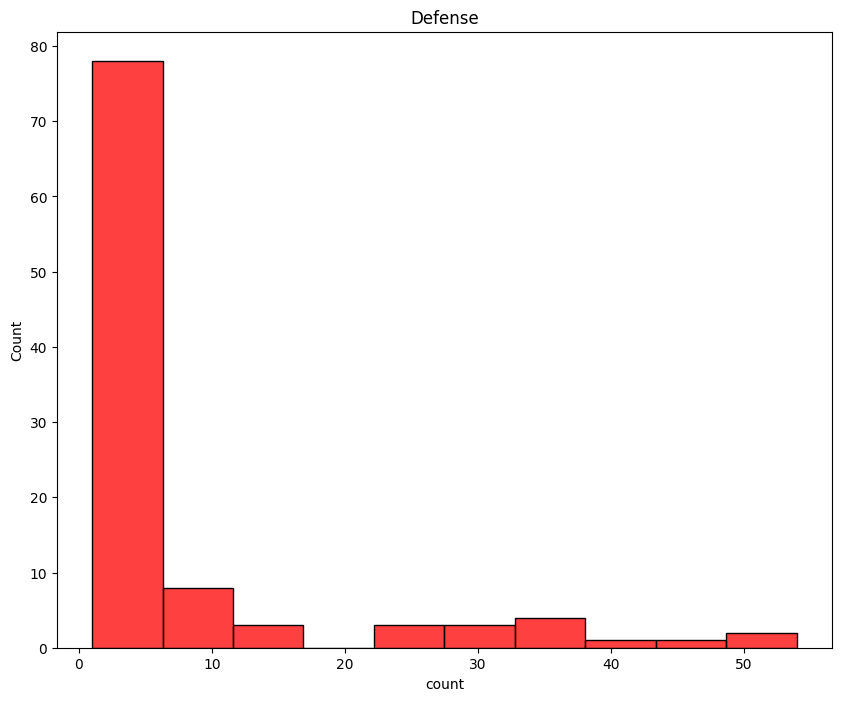

In [26]:
f,ax=plt.subplots(figsize=(10,8))
x=df['Defense'].value_counts()
ax=sns.histplot(x,bins=10,color="red")
plt.title('Defense')
plt.show()

### Correlations

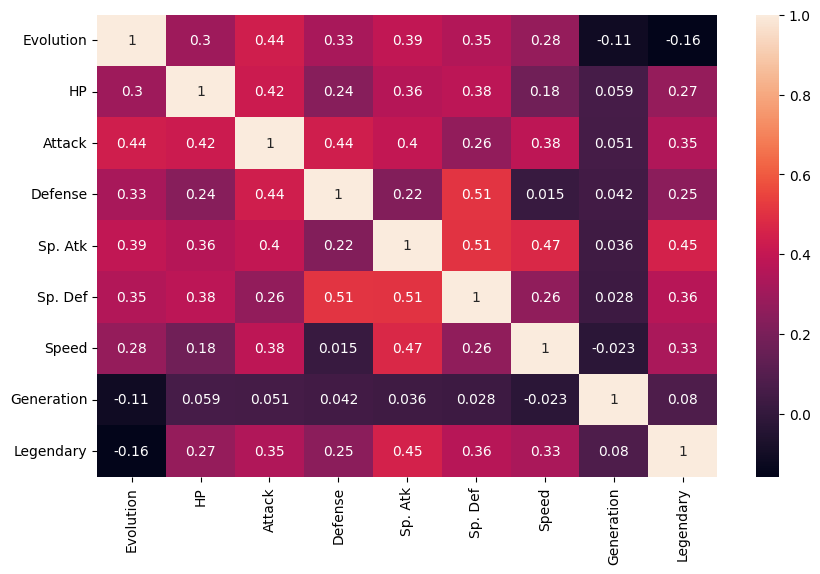

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["Evolution", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

### Type Plot

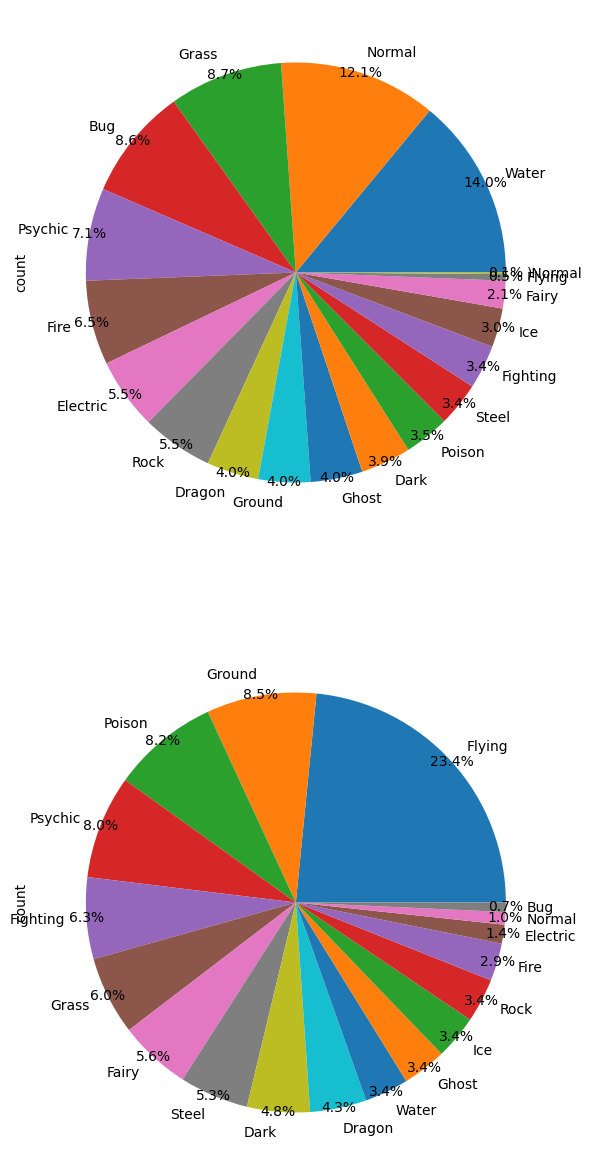

In [28]:
fig = plt.figure(figsize=(15,15))

fig.add_subplot(211)
df['Type 1'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=1.0)

fig.add_subplot(212)
df['Type 2'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=1.0)

plt.show()